# Feature Extraction

## Text Features

Text data is something we have to commonly deal with. One popular way to engineer features out of text data is to create a Vector Space Model `VSM` out of text data. In a VSM, the rows correspond to documents and the columns correspond to words, terms or phrases. The columns are not limited to single words, as in some cases, such as `n-gram` approaches, some columns can represent n-words (phrases). The rows and columns together can be viewed as a matrix where the elements of the matrix represent some importance of the word in that document. The two common representation of a "word" (or a term or phrase) is either through using term frequency-inverse document frequency `TFIDF` or simple counts. Let's see how we can create a VSM model either using counts or TFIDF.

Below, we searched on a popular online distributor company for books using the keywords `data science` or `finance`. Ten of the top search result titles for each of these search phrases are shown below.

In [1]:
text = [
    'Data Science from Scratch: First Principles with Python',
    'Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking',
    'Practical Statistics for Data Scientists',
    'Build a Career in Data Science',
    'Python Data Science Handbook',
    'Storytelling with Data: A Data Visualization Guide for Business Professionals',
    'R for Data Science: Import, Tidy, Transform, Visualize, and Model Data',
    'Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control',
    'A Hands-On Introduction to Data Science',
    'Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and The Cloud',
    'How Finance Works: The HBR Guide to Thinking Smart About the Numbers',
    'The Intelligent Investor: The Definitive Book on Value Investing. A Book of Practical Counsel',
    'Introduction to Finance: Markets, Investments, and Financial Management',
    'Python for Finance: Mastering Data-Driven Finance',
    'The Infographic Guide to Personal Finance: A Visual Reference for Everything You Need to Know',
    'Personal Finance For Dummies',
    'Corporate Finance For Dummies',
    'Lords of Finance: The Bankers Who Broke the World',
    'Real Estate Finance & Investments',
    'Real Estate Finance and Investments Risks and Opportunities'
]

The `CounterVectorizer` class will create a VSM out of this text data using a sparse matrix. We convert the sparse matrix to a dense one and then build a pandas DataFrame out of the resulting VSM. Note how the values of the matrix are simply counts of the number of times a word appears in a book? The values are all greater than or equal to zero.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text).todense()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,about,ai,analytic,and,bankers,big,book,broke,build,business,...,value,visual,visualization,visualize,what,who,with,works,world,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Sometimes, we may just want a VSM where the values are either 0 or 1 to signal if a word appeared in the document. We can set the `binary=True` flag for the `CountVectorizer` constructor.

In [3]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(text).todense()

bool_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
bool_df

,about,ai,analytic,and,bankers,big,book,broke,build,business,...,value,visual,visualization,visualize,what,who,with,works,world,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


If we inspect the words that are being detected, we will notice that some words may not be informative in our tasks. For example, `stop words` are words that occur too much and may have no influence on classification problems dealing with text data. Some of the stop words observed below are `and`, `of`, `in` and `with`. We can specify the VSM to not consider these words as a part of the model.

In [4]:
bool_df.columns

Index(['about', 'ai', 'analytic', 'and', 'bankers', 'big', 'book', 'broke',
       'build', 'business', 'career', 'cloud', 'computer', 'control',
       'corporate', 'counsel', 'data', 'definitive', 'driven', 'dummies',
       'dynamical', 'engineering', 'estate', 'everything', 'finance',
       'financial', 'first', 'for', 'from', 'guide', 'handbook', 'hands',
       'hbr', 'how', 'import', 'in', 'infographic', 'intelligent', 'intro',
       'introduction', 'investing', 'investments', 'investor', 'know',
       'learning', 'lords', 'machine', 'management', 'markets', 'mastering',
       'mining', 'model', 'need', 'numbers', 'of', 'on', 'opportunities',
       'personal', 'practical', 'principles', 'professionals', 'program',
       'python', 'real', 'reference', 'risks', 'science', 'scientists',
       'scratch', 'smart', 'statistics', 'storytelling', 'systems', 'the',
       'thinking', 'tidy', 'to', 'transform', 'value', 'visual',
       'visualization', 'visualize', 'what', 'who', 

We will get a list of [NLTK's](https://www.nltk.org/) stop words from this [site](https://gist.github.com/sebleier/554280) and pass that into the vectorizer's constructor to ignore these words.

In [5]:
with open('stop-words.txt', 'r') as f:
    stop_words = set([word.strip() for word in f if len(word.strip()) > 0])
    
print(f'num of stop words = {len(stop_words)}')

num of stop words = 127


By ignoring stop words, we have reduced the number of words from 88 to 74.

In [6]:
vectorizer = CountVectorizer(binary=True, stop_words=stop_words)
X = vectorizer.fit_transform(text).todense()

bool_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())

print(bool_df.shape)
bool_df.columns

(20, 74)


Index(['ai', 'analytic', 'bankers', 'big', 'book', 'broke', 'build',
       'business', 'career', 'cloud', 'computer', 'control', 'corporate',
       'counsel', 'data', 'definitive', 'driven', 'dummies', 'dynamical',
       'engineering', 'estate', 'everything', 'finance', 'financial', 'first',
       'guide', 'handbook', 'hands', 'hbr', 'import', 'infographic',
       'intelligent', 'intro', 'introduction', 'investing', 'investments',
       'investor', 'know', 'learning', 'lords', 'machine', 'management',
       'markets', 'mastering', 'mining', 'model', 'need', 'numbers',
       'opportunities', 'personal', 'practical', 'principles', 'professionals',
       'program', 'python', 'real', 'reference', 'risks', 'science',
       'scientists', 'scratch', 'smart', 'statistics', 'storytelling',
       'systems', 'thinking', 'tidy', 'transform', 'value', 'visual',
       'visualization', 'visualize', 'works', 'world'],
      dtype='object')

What if we want to consider n-grams or phrases? We can specify n-grams with `ngram_range`. But, now, observe how the columns or fields have expanded from 77 to 167!

In [7]:
vectorizer = CountVectorizer(binary=True, stop_words=stop_words, ngram_range=(1, 2))
X = vectorizer.fit_transform(text).todense()

bool_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())

print(bool_df.shape)
bool_df.columns

(20, 167)


Index(['ai', 'ai big', 'analytic', 'analytic thinking', 'bankers',
       'bankers broke', 'big', 'big data', 'book', 'book practical',
       ...
       'value investing', 'visual', 'visual reference', 'visualization',
       'visualization guide', 'visualize', 'visualize model', 'works',
       'works hbr', 'world'],
      dtype='object', length=167)

Below, we will create 3 VSMs.

- one VSM as a boolean VSM
- one VSM as a count VSM
- one VSM as a TFIDF VSM

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

clazz = [1 for _ in range(10)] + [0 for _ in range(10)]

vectorizer = CountVectorizer(binary=True, stop_words=stop_words, ngram_range=(1, 2))
X = vectorizer.fit_transform(text).todense()
bool_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
bool_df['clazz'] = clazz

vectorizer = CountVectorizer(binary=False, stop_words=stop_words, ngram_range=(1, 2))
X = vectorizer.fit_transform(text).todense()
count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df['clazz'] = clazz

vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 2))
X = vectorizer.fit_transform(text).todense()
tfidf_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
tfidf_df['clazz'] = clazz

print(bool_df.shape)
print(count_df.shape)
print(tfidf_df.shape)

(20, 168)
(20, 168)
(20, 168)


This part is going off topic, but once we have extracted the features of the text (book titles), we can now plot the cross correlations of these terms with each other and the book type (class).

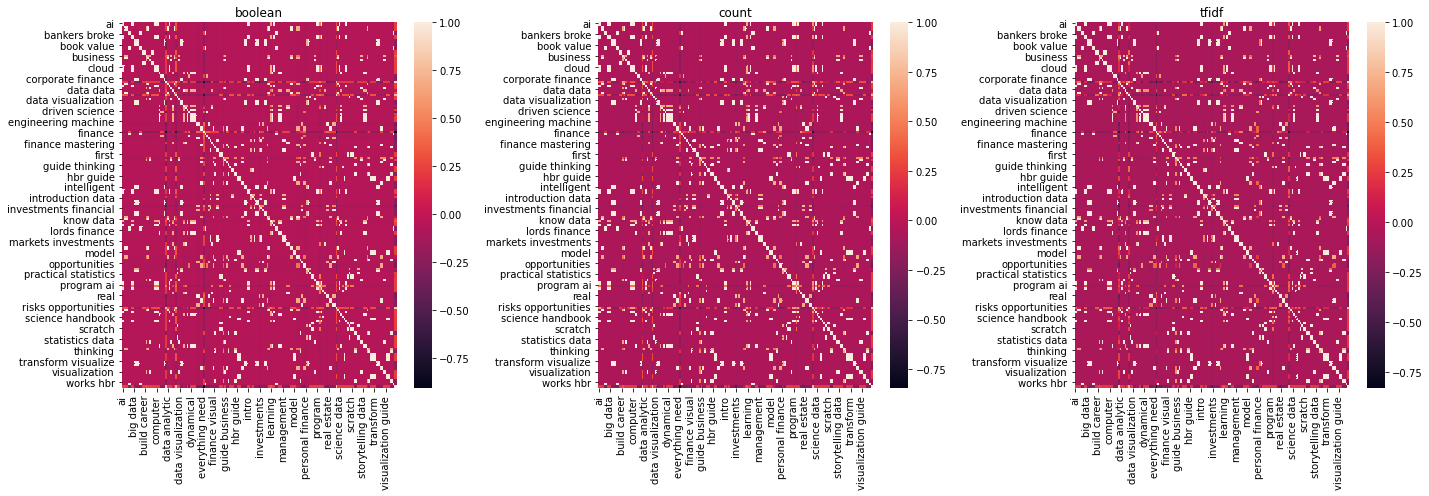

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(37)

bool_corr = bool_df.corr()
count_corr = count_df.corr()
tfidf_corr = tfidf_df.corr()

corrs = [bool_corr, count_corr, tfidf_corr]
titles = ['boolean', 'count', 'tfidf']

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = np.ravel(axes)

for corr, title, ax in zip(corrs, titles, axes):
    _ = sns.heatmap(corr, ax=ax)
    _ = ax.set_title(f'{title}')
    
plt.tight_layout()

We can just take a look at how the boolean indication, counts or TFIDF of a phrase correlates with the two classes. As you can see below, `data`, `data science`, `science` correlate well with data science books (blue) and `finance` and `investments` correlate well with finance books. It seems the VSM models end up producing features that correlate the same with the class of books.

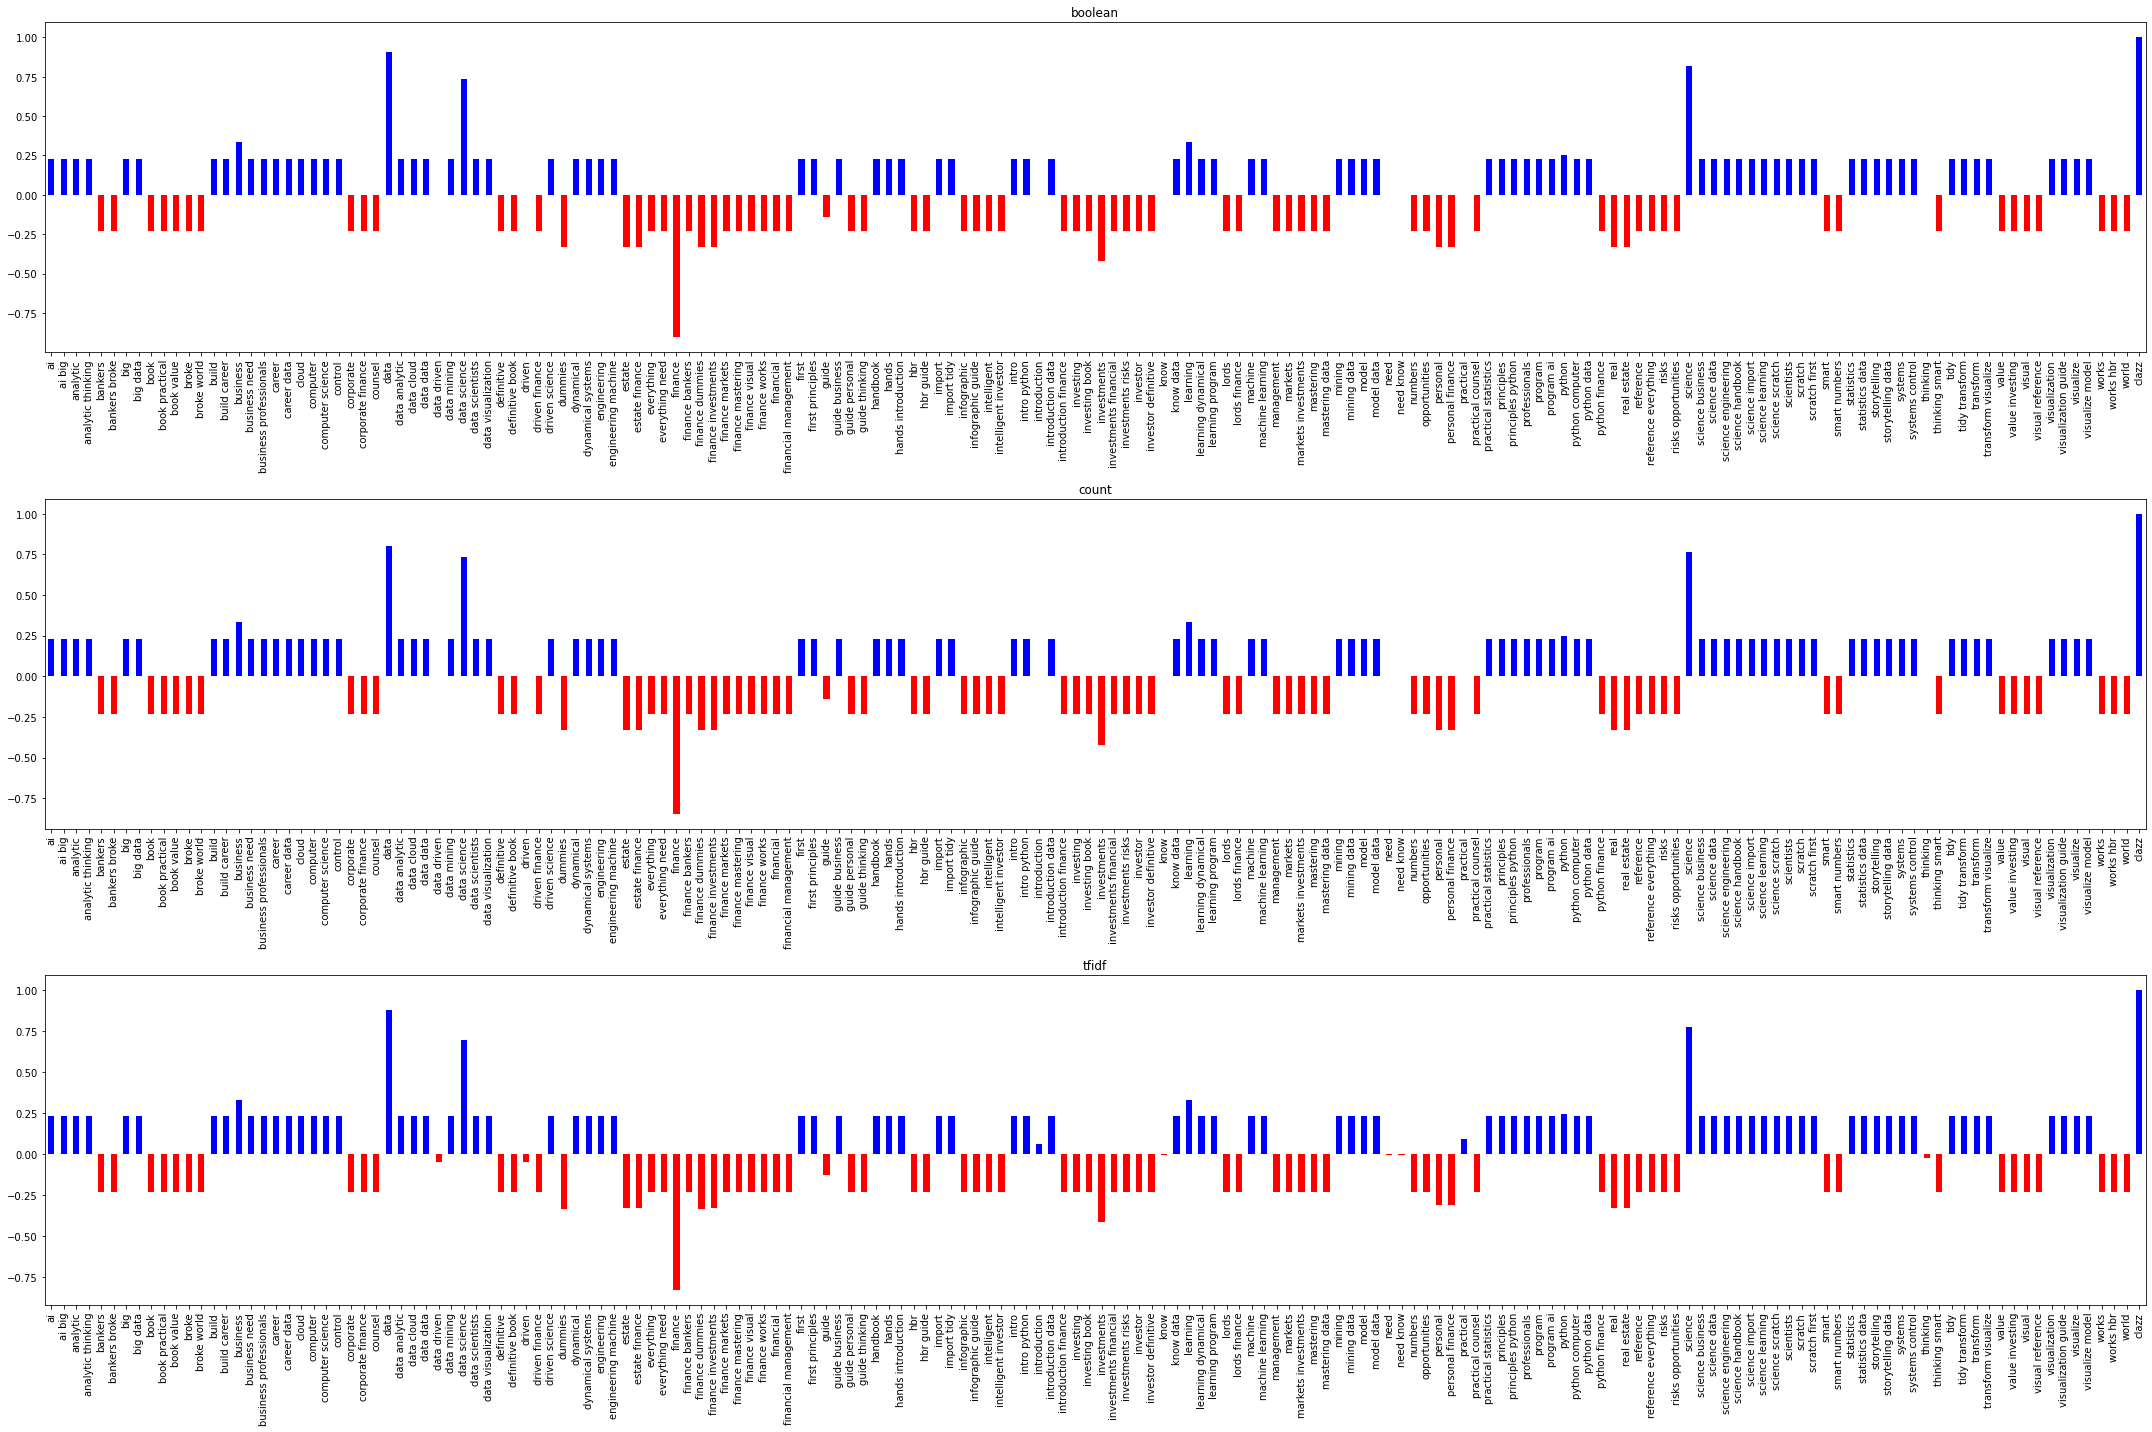

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(30, 20))
axes = np.ravel(axes)

for corr, title, ax in zip(corrs, titles, axes):
    s = corr.loc['clazz']
    s.plot(kind='bar', color=(s > 0).map({True: 'b', False: 'r'}), ax=ax)
    _ = ax.set_title(f'{title}')
    
plt.tight_layout()

We can try to cluster the documents in 2D space by first vectorizing the documents, then apply a dimensional reduction to 2D, and finally cluster the documents. 

- blue dots represent finance books
- red dots represent data science books 
- magenta dots represents mis-clustered data science books (there are 2 of these)

The silhouette score for the true and predicted class labels are also computed.

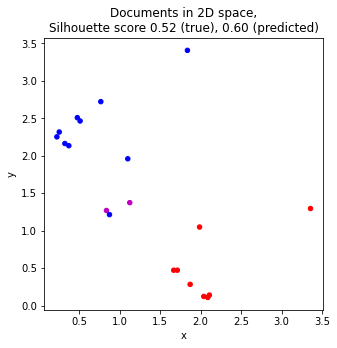

In [11]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

def get_color(r):
    if r.y_true == r.y_pred:
        if r.y_true == 0:
            return 'b'
        else:
            return 'r'
    else:
        if r.y_true == 0:
            return 'g'
        else:
            return 'm'

vectorizer = CountVectorizer(binary=True, stop_words=stop_words, ngram_range=(1, 2))
dimensionality = TruncatedSVD(n_components=2, random_state=37)
clusterer = KMeans(n_clusters=2, random_state=37)
pipeline = Pipeline([
    ('vectorizer', vectorizer), 
    ('dimensionality', dimensionality), 
    ('clusterer', clusterer)
])

X = pipeline.fit_transform(text)
X = pd.DataFrame(X, columns=['x', 'y'])
X['y_true'] = clazz
X['y_pred'] = pipeline.predict(text)
X['color'] = X.apply(lambda r: get_color(r), axis=1)

score_true = silhouette_score(X[['x', 'y']], X.y_true)
score_pred = silhouette_score(X[['x', 'y']], X.y_pred)

fig, ax = plt.subplots(figsize=(5, 5))

_ = X.plot(kind='scatter', x='x', y='y', c=X.color, 
           title=f'Documents in 2D space,\nSilhouette score {score_true:.2f} (true), {score_pred:.2f} (predicted)', 
           ax=ax)

We can also see if the extracted features are helpful in a classification problem. Below, we vectorize the text and apply logistic regression. As can be seen, the AUC score is perfect (no validation) and the coefficients look very much like the class-feature correlations.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

vectorizer = CountVectorizer(binary=True, stop_words=stop_words, ngram_range=(1, 2))
regressor = LogisticRegression(penalty='l2', solver='liblinear', fit_intercept=False, C=0.01, random_state=37)
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('regressor', regressor)
])

pipeline.fit(text, clazz)
y_pred = pipeline.predict(text)
roc_auc_score(clazz, y_pred)

1.0

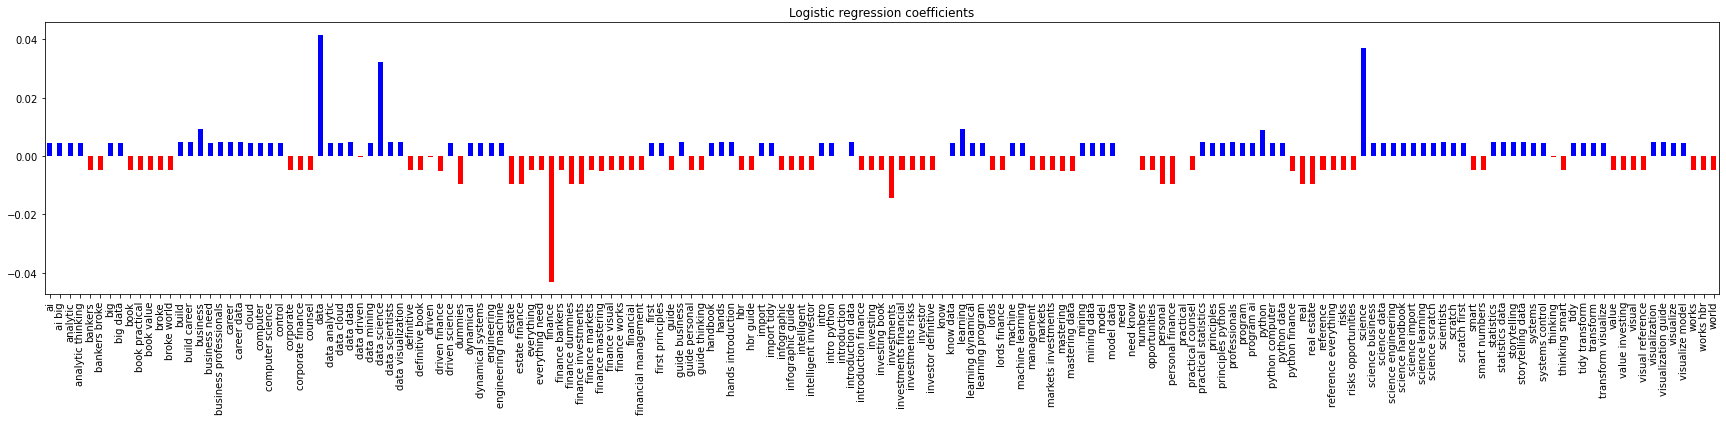

In [13]:
s = pd.Series(regressor.coef_[0], vectorizer.get_feature_names())
_ = s.plot(kind='bar', figsize=(30, 5), color=(s > 0).map({True: 'b', False: 'r'}), title='Logistic regression coefficients')